**WELCOME TO PART II HACKERS**

> We will quickly introduce you to the various packages you will need to help you develop the Geographical Information System application/website/dashboard using Colab


---



1.   GEEMAP is a Python package for interactive geospatial analysis and visualization with Google Earth Engine (GEE), which is a cloud computing platform with a multi-petabyte catalog of satellite imagery and geospatial datasets. You will need to install it to interact with readily available satellite image data.




In [1]:
!pip install geemap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 6.5 MB/s eta 0:00:00


In [2]:
!pip install PyCRS

  Preparing metadata (setup.py) ... done
  Created wheel for PyCRS: filename=PyCRS-1.0.2-py3-none-any.whl size=32687 sha256=1bac22f679721144b30413a675f0a1fddc35f837de7d1c97fa20c7e4bbf13d98
  Stored in directory: /root/.cache/pip/wheels/47/1d/70/7a5bdf33347e7c75e95b06b1fa38f076a59a9506653cc24aff
Successfully built PyCRS


In [3]:
import geemap

In [4]:
import ee

In [5]:
import os

In [6]:
import geopandas

In [7]:
from geemap import geojson_to_ee, ee_to_geojson


2.   Authentication with Earth Engine is required to connect your project with Earth Engine



Run the ee.Authenticate function to authenticate your access to Earth Engine servers and ee.Initialize to initialize it. Upon running the following cell you'll be asked to grant Earth Engine access to your Google account. More at: https://developers.google.com/earth-engine/guides/python_install

In case ee.Initialize() is not running, you need to create your own cloud EE project and enable API direclty to allow Colab to use EE features through this link: https://developers.google.com/earth-engine/cloud/earthengine_cloud_project_setup (follow the link on the section "Create a Cloud project" then proceed with the next section "Enable the Earth Engine API")

In [8]:
ee.Authenticate()

In [10]:
ee.Initialize (project = 'g20-brazil')

Alternatively: Open GEE Code Editor https://code.earthengine.google.com/, set up your own project manually (set up a non commerciable project) and enable permission for the GEE APIs for Colab.


```
ee.Initialize (project='your project name')
```





---



Now let's start with basic vizualization process, first you will be asked to upload the batch of shapefiles provided to you in your local file folder in collab. The Brazil.shp file serves as the official country boundary of our area of interest.

In [12]:
from google.colab import drive
drive.mount('/gdrive')

%cd /gdrive/MyDrive/G20/Data

Mounted at /gdrive
/gdrive/.shortcut-targets-by-id/1c-3kX3SnlFERtZsMmgo1CczCIJ8F4T8m/Data


In [16]:
brazil_shapefile = geemap.shp_to_ee('Brazil/Brazil/Brazil.shp')

Next, let's see how the land cover was in January 1st 2004 in Brazil using the MODIS MCD12Q1 Type 1 Land Cover

In [17]:
Map = geemap.Map()

landcover = ee.Image('MODIS/006/MCD12Q1/2004_01_01').select('LC_Type1')

igbpLandCoverVis = {
    'min': 1.0,
    'max': 17.0,
    'palette': [
        '05450a',
        '086a10',
        '54a708',
        '78d203',
        '009900',
        'c6b044',
        'dcd159',
        'dade48',
        'fbff13',
        'b6ff05',
        '27ff87',
        'c24f44',
        'a5a5a5',
        'ff6d4c',
        '69fff8',
        'f9ffa4',
        '1c0dff',
    ],
}
brazil_lc = landcover.clip(brazil_shapefile)
Map.setCenter(-55, -10, 4)
Map.addLayer(brazil_lc, igbpLandCoverVis, 'MODIS Land Cover')

Map

Map(center=[-10, -55], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(ch…

In [ ]:
        ['1-5'] forest
        ['6-7'] shrublands
        ['8-9-16'] savannas
        ['12-14'] croplands
        ['10'] grasslands
        ['11'] wetlands
        ['15'] snowIce

In [18]:
Map.add_legend(builtin_legend='MODIS/051/MCD12Q1')

Next, we can compute basic statistics of how much hectares of each LC type was in Brazil in 2004. This line will allow you to donwload the results in your colab directory

In [19]:
out_dir = os.path.join(os.path.expanduser('~'), 'Downloads')
global_stats = os.path.join(out_dir, 'global_stats_sum.csv')

# statistics_type can be either 'SUM' or 'PERCENTAGE'
# denominator can be used to convert square meters to other areal units, such as square kilimeters
geemap.zonal_statistics_by_group(
    landcover,
    brazil_shapefile,
    global_stats,
    statistics_type='SUM',
    denominator=1000000,
    decimal_places=2,
)

Computing ... 
Generating URL ...
Please wait ...
Data downloaded to /root/Downloads/global_stats_sum.csv


Better: you can just count the number of pixel for each class. As a pixel for a MODIS image is 250 m x 250 m, the area for one class will be number of pixel x 250 x 250

In [23]:
import csv


In [20]:
# A FeatureCollection defining Brazil boundary.
fc = ee.FeatureCollection('USDOS/LSIB_SIMPLE/2017').filter(
    'country_na == "Brazil"'
)
lc03 = ee.Image('MODIS/006/MCD12Q1/2003_01_01').select('LC_Type1')
lc04 = ee.Image('MODIS/006/MCD12Q1/2004_01_01').select('LC_Type1')
lc05 = ee.Image('MODIS/006/MCD12Q1/2005_01_01').select('LC_Type1')
lc06 = ee.Image('MODIS/006/MCD12Q1/2006_01_01').select('LC_Type1')
lc07 = ee.Image('MODIS/006/MCD12Q1/2007_01_01').select('LC_Type1')
lc08 = ee.Image('MODIS/006/MCD12Q1/2008_01_01').select('LC_Type1')
lc09 = ee.Image('MODIS/006/MCD12Q1/2009_01_01').select('LC_Type1')
lc10 = ee.Image('MODIS/006/MCD12Q1/2010_01_01').select('LC_Type1')
lc11 = ee.Image('MODIS/006/MCD12Q1/2011_01_01').select('LC_Type1')
lc12 = ee.Image('MODIS/006/MCD12Q1/2012_01_01').select('LC_Type1')
lc13 = ee.Image('MODIS/006/MCD12Q1/2013_01_01').select('LC_Type1')
lc14 = ee.Image('MODIS/006/MCD12Q1/2014_01_01').select('LC_Type1')
lc15 = ee.Image('MODIS/006/MCD12Q1/2015_01_01').select('LC_Type1')
lc16 = ee.Image('MODIS/006/MCD12Q1/2016_01_01').select('LC_Type1')
lc17 = ee.Image('MODIS/006/MCD12Q1/2017_01_01').select('LC_Type1')
lc18 = ee.Image('MODIS/006/MCD12Q1/2018_01_01').select('LC_Type1')
lc19 = ee.Image('MODIS/006/MCD12Q1/2019_01_01').select('LC_Type1')
lc20 = ee.Image('MODIS/006/MCD12Q1/2020_01_01').select('LC_Type1')



# Calculate pixel areas
areaImage = ee.Image.pixelArea().addBands(lc14)

# Reduce the region to get summed areas
areas = areaImage.reduceRegion(
    reducer=ee.Reducer.sum().group(groupField=1, groupName='class'),
    geometry=fc.geometry(),
    scale=500,
    maxPixels=1e10
)

# Print the result
print(areas.getInfo())

groups = areas.getInfo()['groups']

# Inizializza un nuovo dizionario per le aree sommate
summed_areas = { '1-5': 0, '6-7': 0, '8-9-16': 0, '12-14': 0 ,'10':0, '11':0, '15': 0}

# Itera attraverso tutti i gruppi e somma le aree per le classi pertinenti
for group in groups:
    clazz = group['class']
    group['sum'] = group['sum']/ 1000000  # convert from m2 to km2
    if clazz in [1, 2, 3, 4, 5]:
        summed_areas['1-5'] += group['sum']
    elif clazz in [6, 7]:
        summed_areas['6-7'] += group['sum']
    elif clazz in [8, 9, 16]:
        summed_areas['8-9-16'] += group['sum']
    elif clazz in [12, 14]:
        summed_areas['12-14'] += group['sum']
    elif clazz in [10]:
        summed_areas['10'] += group['sum']
    elif clazz in [11]:
        summed_areas['11'] += group['sum']
    elif clazz in [15]:
        summed_areas['15'] += group['sum']


# Print the summed areas
print(summed_areas)


# Salvare il dizionario in un file CSV
with open('/gdrive/MyDrive/G20/summed_areasYEAR.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(['Class', 'Area'])
    for key, value in summed_areas.items():
        writer.writerow([key, value])

{'groups': [{'class': 1, 'sum': 309980291.4876225}, {'class': 2, 'sum': 3533992334757.3857}, {'class': 4, 'sum': 46283395108.926895}, {'class': 5, 'sum': 5124016513.336519}, {'class': 6, 'sum': 43589139744.15362}, {'class': 7, 'sum': 3595515855.2227325}, {'class': 8, 'sum': 389069629629.309}, {'class': 9, 'sum': 2089060513388.6626}, {'class': 10, 'sum': 1807128008565.1658}, {'class': 11, 'sum': 59962619903.20342}, {'class': 12, 'sum': 286494945558.9042}, {'class': 13, 'sum': 39722254017.48277}, {'class': 14, 'sum': 83534346409.29033}, {'class': 16, 'sum': 3117226010.5401964}, {'class': 17, 'sum': 79723507550.9369}]}


In [30]:
import csv
import os

# A dictionary of images for each year.
lc = {
     '2003': ee.Image('MODIS/006/MCD12Q1/2003_01_01').select('LC_Type1'),
     '2004': ee.Image('MODIS/006/MCD12Q1/2004_01_01').select('LC_Type1'),
     '2005': ee.Image('MODIS/006/MCD12Q1/2005_01_01').select('LC_Type1'),
     '2006': ee.Image('MODIS/006/MCD12Q1/2006_01_01').select('LC_Type1'),
     '2007': ee.Image('MODIS/006/MCD12Q1/2007_01_01').select('LC_Type1'),
     '2008': ee.Image('MODIS/006/MCD12Q1/2008_01_01').select('LC_Type1'),
     '2009': ee.Image('MODIS/006/MCD12Q1/2009_01_01').select('LC_Type1'),
     '2010': ee.Image('MODIS/006/MCD12Q1/2010_01_01').select('LC_Type1'),
     '2011': ee.Image('MODIS/006/MCD12Q1/2011_01_01').select('LC_Type1'),
     '2012': ee.Image('MODIS/006/MCD12Q1/2012_01_01').select('LC_Type1'),
     '2013': ee.Image('MODIS/006/MCD12Q1/2013_01_01').select('LC_Type1'),
     '2014': ee.Image('MODIS/006/MCD12Q1/2014_01_01').select('LC_Type1'),
     '2015': ee.Image('MODIS/006/MCD12Q1/2015_01_01').select('LC_Type1'),
     '2016': ee.Image('MODIS/006/MCD12Q1/2016_01_01').select('LC_Type1'),
     '2017': ee.Image('MODIS/006/MCD12Q1/2017_01_01').select('LC_Type1'),
     '2018': ee.Image('MODIS/006/MCD12Q1/2018_01_01').select('LC_Type1'),
     '2019': ee.Image('MODIS/006/MCD12Q1/2019_01_01').select('LC_Type1'),
     '2020': ee.Image('MODIS/006/MCD12Q1/2020_01_01').select('LC_Type1'),
}

# Drive link
drive_link = '/gdrive/MyDrive/G20/'

# process each year
for year, image in lc.items():

    # Calculate pixel areas
    areaImage = ee.Image.pixelArea().addBands(image)

    # Reduce the region to get summed areas
    areas = areaImage.reduceRegion(
        reducer=ee.Reducer.sum().group(groupField=1, groupName='class'),
        geometry=fc.geometry(),
        scale=500,
        maxPixels=1e10
    )

    groups = areas.getInfo()['groups']

    # Initialize a new dictionary for the summed areas
    summed_areas = { '1-5': 0, '6-7': 0, '8-9-16': 0, '12-14': 0 ,'10':0, '11':0, '15': 0}

    # Itera attraverso tutti i gruppi e somma le aree per le classi pertinenti
    for group in groups:
        clazz = group['class']
        group['sum'] = group['sum']/ 1000000  # convert from m2 to km2
        if clazz in [1, 2, 3, 4, 5]:
            summed_areas['1-5'] += group['sum']
        elif clazz in [6, 7]:
            summed_areas['6-7'] += group['sum']
        elif clazz in [8, 9, 16]:
            summed_areas['8-9-16'] += group['sum']
        elif clazz in [12, 14]:
            summed_areas['12-14'] += group['sum']
        elif clazz in [10]:
            summed_areas['10'] += group['sum']
        elif clazz in [11]:
            summed_areas['11'] += group['sum']
        elif clazz in [15]:
            summed_areas['15'] += group['sum']

    # Save the summed areas to a CSV file
    with open(os.path.join(drive_link, f'summed_areas_{year}.csv'), 'w', newline='') as f:
        writer = csv.writer(f)
        writer.writerow(['Class', 'Area'])
        for key, value in summed_areas.items():
            writer.writerow([key, value])

    Class          Area
0     1-5  3.745797e+06
1     6-7  5.545335e+04
2  8-9-16  2.433815e+06
3   12-14  3.112496e+05
4      10  1.750164e+06
5      11  5.506394e+04
6      15  0.000000e+00
    Class          Area
0     1-5  3.726132e+06
1     6-7  5.428568e+04
2  8-9-16  2.440712e+06
3   12-14  3.158624e+05
4      10  1.758771e+06
5      11  5.493950e+04
6      15  0.000000e+00
    Class          Area
0     1-5  3.696874e+06
1     6-7  5.433361e+04
2  8-9-16  2.455999e+06
3   12-14  3.210753e+05
4      10  1.766831e+06
5      11  5.509158e+04
6      15  0.000000e+00
    Class          Area
0     1-5  3.668742e+06
1     6-7  5.370135e+04
2  8-9-16  2.475725e+06
3   12-14  3.271341e+05
4      10  1.769055e+06
5      11  5.567936e+04
6      15  0.000000e+00
    Class          Area
0     1-5  3.652398e+06
1     6-7  5.330889e+04
2  8-9-16  2.485936e+06
3   12-14  3.334240e+05
4      10  1.768629e+06
5      11  5.634461e+04
6      15  0.000000e+00
    Class          Area
0     1-5  3.642

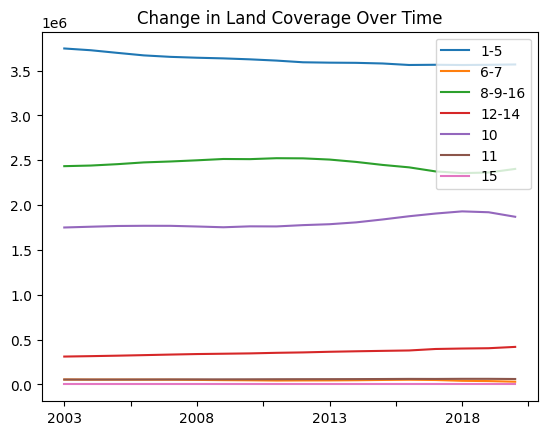

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import glob

# The path to your CSV files
path = "/gdrive/MyDrive/G20"

# Get a list of all the CSV files
all_files = sorted(glob.glob(f"{path}/summed_areas_*.csv"))

# A dictionary to accumulate the data for each class
data = {}

# Loop through all the files
for filename in all_files:
    # Get the year from the filename
    year = filename.split('_')[-1].split('.')[0]

    # Load the current file into a dataframe
    df = pd.read_csv(filename)
    print(df)
    # Loop through each row (class) in the dataframe
    for _, row in df.iterrows():
        # If the class is not already in the data dictionary, add it
        if row['Class'] not in data:
            data[row['Class']] = {}
        # Add the area for the current class for this year
        data[row['Class']][year] = row['Area']

# Make a dataframe from the accumulated data
df = pd.DataFrame(data)

# Plot the dataframe
df.plot(kind='line', title='Change in Land Coverage Over Time')
plt.show()

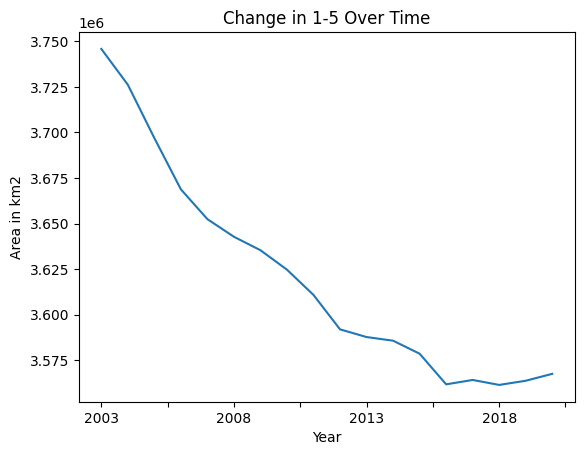

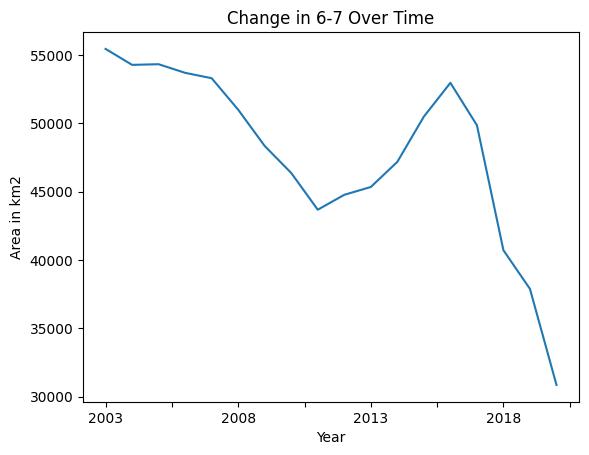

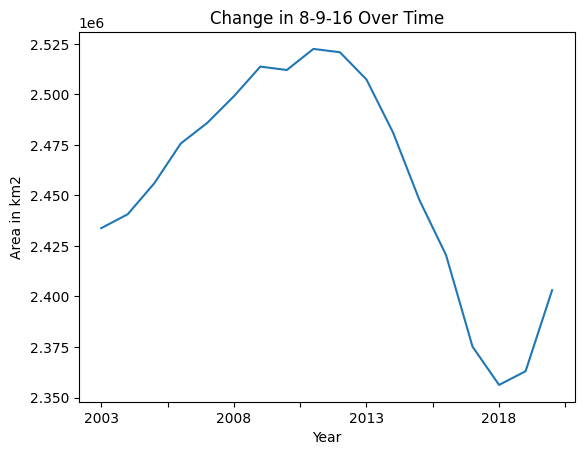

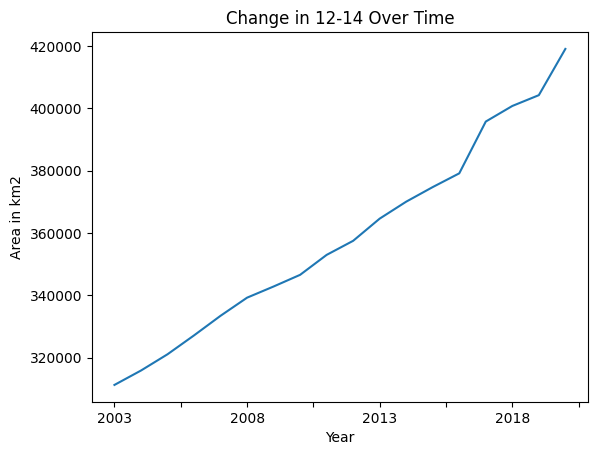

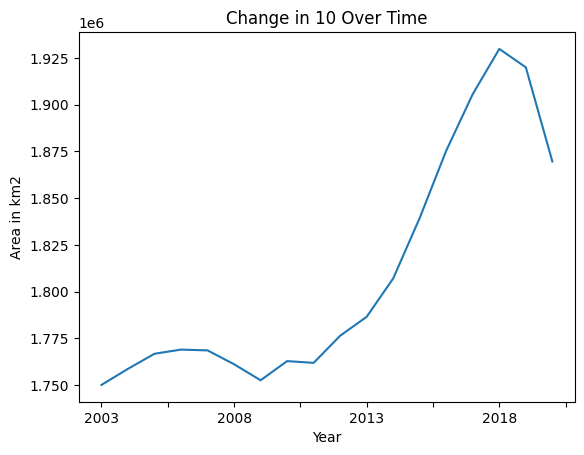

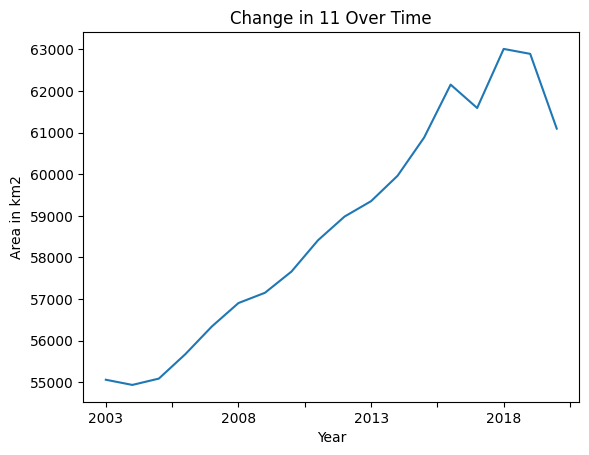

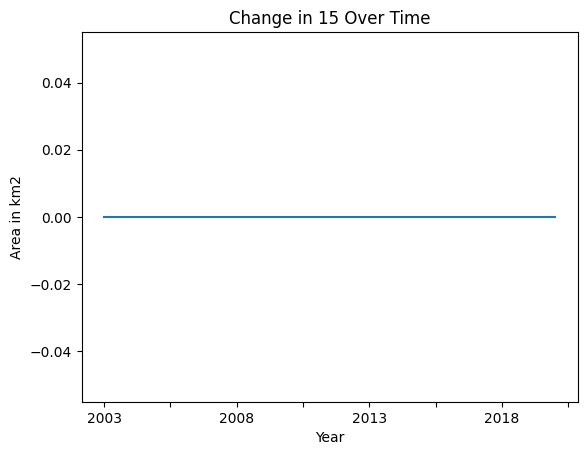

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import glob

# The path to your CSV files
path = "/gdrive/MyDrive/G20"

# Get a list of all the CSV files
all_files = sorted(glob.glob(f"{path}/summed_areas_*.csv"))

# A dictionary to accumulate the data for each class
data = {}

# Loop through all the files
for filename in all_files:
    # Get the year from the filename
    year = filename.split('_')[-1].split('.')[0]

    # Load the current file into a dataframe
    df = pd.read_csv(filename)

    # Loop through each row (class) in the dataframe
    for _, row in df.iterrows():
        # If the class is not already in the data dictionary, add it
        if row['Class'] not in data:
            data[row['Class']] = {}

        # Add the area for the current class for this year
        data[row['Class']][year] = row['Area']

# Make a dataframe from the accumulated data
df = pd.DataFrame(data)

# Loop over each class (column)
for col in df.columns:

    # Plot the data for current class
    df[col].plot(kind='line')

    # Set title and labels
    plt.title(f'Change in {col} Over Time')
    plt.xlabel('Year')
    plt.ylabel('Area in km2')

    # Show the plot
    plt.show()

In [26]:
print(os.getcwd())

/gdrive/.shortcut-targets-by-id/1c-3kX3SnlFERtZsMmgo1CczCIJ8F4T8m/Data


In [27]:
groups = areas.getInfo()['groups']

# Inizializza un nuovo dizionario per le aree sommate
summed_areas = { '1-5': 0, '6-7': 0, '8-9-16': 0, '12-14': 0 ,'10':0, '11':0, '15': 0}

# Itera attraverso tutti i gruppi e somma le aree per le classi pertinenti
for group in groups:
    clazz = group['class']
    if clazz in [1, 2, 3, 4, 5]:
        summed_areas['1-5'] += group['sum']
    elif clazz in [6, 7]:
        summed_areas['6-7'] += group['sum']
    elif clazz in [8, 9, 16]:
        summed_areas['8-9-16'] += group['sum']
    elif clazz in [12, 14]:
        summed_areas['12-14'] += group['sum']
    elif clazz in [10]:
        summed_areas['10'] += group['sum']
    elif clazz in [11]:
        summed_areas['11'] += group['sum']
    elif clazz in [15]:
        summed_areas['15'] += group['sum']


# Print the summed areas
print(summed_areas)


# Salvare il dizionario in un file CSV
with open('/gdrive/MyDrive/G20/summed_areas.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(['Class', 'Area'])
    for key, value in summed_areas.items():
        writer.writerow([key, value])

{'1-5': 3585709726671.1367, '6-7': 47184655599.37635, '8-9-16': 2481247369028.5117, '12-14': 370029291968.1945, '10': 1807128008565.1658, '11': 59962619903.20342, '15': 0}


Now, let's pull a time series vizualization of the landcover in Brazil



1.   This is the long code to help you understand the process



In [ ]:
Map = geemap.Map()

lc03 = ee.Image('MODIS/006/MCD12Q1/2003_01_01').select('LC_Type1')
lc14 = ee.Image('MODIS/006/MCD12Q1/2014_01_01').select('LC_Type1')
lc15 = ee.Image('MODIS/006/MCD12Q1/2015_01_01').select('LC_Type1')
lc16 = ee.Image('MODIS/006/MCD12Q1/2016_01_01').select('LC_Type1')
lc17 = ee.Image('MODIS/006/MCD12Q1/2017_01_01').select('LC_Type1')
lc18 = ee.Image('MODIS/006/MCD12Q1/2018_01_01').select('LC_Type1')
lc19 = ee.Image('MODIS/006/MCD12Q1/2019_01_01').select('LC_Type1')
lc20 = ee.Image('MODIS/006/MCD12Q1/2020_01_01').select('LC_Type1')

igbpLandCoverVis = {
    'min': 1.0,
    'max': 17.0,
    'palette': [
        '05450a',
        '086a10',
        '54a708',
        '78d203',
        '009900',
        'c6b044',
        'dcd159',
        'dade48',
        'fbff13',
        'b6ff05',
        '27ff87',
        'c24f44',
        'a5a5a5',
        'ff6d4c',
        '69fff8',
        'f9ffa4',
        '1c0dff',
    ],
}
brazil_lc03 = lc03.clip(brazil_shapefile)
brazil_lc14 = lc14.clip(brazil_shapefile)
brazil_lc15 = lc15.clip(brazil_shapefile)
brazil_lc16 = lc16.clip(brazil_shapefile)
brazil_lc17 = lc17.clip(brazil_shapefile)
brazil_lc18 = lc18.clip(brazil_shapefile)
brazil_lc19 = lc19.clip(brazil_shapefile)
brazil_lc20 = lc20.clip(brazil_shapefile)

Map.setCenter(-55, -10, 4)
Map.addLayer(brazil_lc14, igbpLandCoverVis, 'MODIS Land Cover 2014')
Map.addLayer(brazil_lc15, igbpLandCoverVis, 'MODIS Land Cover 2015')
Map.addLayer(brazil_lc16, igbpLandCoverVis, 'MODIS Land Cover 2016')
Map.addLayer(brazil_lc17, igbpLandCoverVis, 'MODIS Land Cover 2017')
Map.addLayer(brazil_lc18, igbpLandCoverVis, 'MODIS Land Cover 2018')
Map.addLayer(brazil_lc19, igbpLandCoverVis, 'MODIS Land Cover 2019')
Map.addLayer(brazil_lc20, igbpLandCoverVis, 'MODIS Land Cover 2020')

Map.addLayerControl()

Map

Map(center=[-10, -55], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(ch…

NEXT is how you import and add population density to the previous map

In [ ]:
dataset = ee.ImageCollection('WorldPop/GP/100m/pop')

# Visualization parameters
visualization = {
  'bands': ['population'],
  'min': 0.0,
  'max': 50.0,
  'palette': ['24126c', '1fff4f', 'd4ff50']
}

# Set center of the map
center = [34.769, 113.643]
zoom = 7

# Add the layer to the map
image = dataset.mean()
Map.addLayer(image, visualization, 'Population')




2.   This is how it looks like when it is more intricate (you might laugh cause it is not at all intricate for you)


In [ ]:
# Load MODIS land cover images for multiple years
years = range(2002, 2021)  # 2002 to 2020
lc_images = []

for year in years:
    lc_image = ee.Image(f"MODIS/006/MCD12Q1/{year}_01_01").select('LC_Type1')
    lc_images.append(lc_image)

# Visualization parameters
igbpLandCoverVis = {
    'min': 1.0,
    'max': 17.0,
    'palette': [
        '05450a', '086a10', '54a708', '78d203', '009900', 'c6b044',
        'dcd159', 'dade48', 'fbff13', 'b6ff05', '27ff87', 'c24f44',
        'a5a5a5', 'ff6d4c', '69fff8', 'f9ffa4', '1c0dff'
    ]
}

# Clip the land cover images to Brazil
brazil_lc_images = [lc.clip(brazil_shapefile) for lc in lc_images]

# Display the land cover images for each year
Map = geemap.Map(center=[-10, -55], zoom=4)

for i, lc_image in enumerate(brazil_lc_images):
    Map.addLayer(lc_image, igbpLandCoverVis, f'MODIS Land Cover {years[i]}')

legend_keys = ['Evergreen Needleleaf Forests', 'Evergreen Broadleaf Forests', 'Deciduous Needleleaf Forests', 'Deciduous Broadleaf Forests',
               'Mixed Forests', 'Closed Shrublands', 'Open Shrublands', 'Woody Savannas',
               'Savannas', 'Grasslands', 'Permanent Wetlands', 'Croplands', 'Urban and Built-up',
               'Cropland/Natural Vegetation Mosaics', 'Permanent Snow and Ice', 'Barren', 'Water Bodies']
igbpLandCoverVisu = ['05450a', '086a10', '54a708', '78d203', '009900', 'c6b044',
        'dcd159', 'dade48', 'fbff13', 'b6ff05', '27ff87', 'c24f44',
        'a5a5a5', 'ff6d4c', '69fff8', 'f9ffa4', '1c0dff']

Map.add_legend(keys=legend_keys, colors=igbpLandCoverVisu, position='bottomright')
Map.addLayerControl()

Map


You can also suggest a side by side vizualization of the land cover, allowing one to vizaully assess the extent of degradation over time.

In [ ]:
Map = geemap.Map(center=[-9, -51], zoom=10)

left_layer = geemap.ee_tile_layer(brazil_lc03, igbpLandCoverVis, "MODIS")
right_layer = geemap.ee_tile_layer(brazil_lc20, igbpLandCoverVis, "MODIS")
Map.split_map(left_layer, right_layer)
Map.add_legend(
    title="Land cover 2003", builtin_legend='MODIS/006/MCD12Q1', position='bottomleft'
)
Map.add_legend(
    title="Land cover 2020",
    builtin_legend='MODIS/006/MCD12Q1',
    position='bottomright',
)


Map

This part is more fun!!! Using the timeseries tool to compare 20 years of landcover against each other.

In [ ]:
col = ee.ImageCollection('MODIS/006/MCD12Q1').select('LC_Type1');

In [ ]:
# A FeatureCollection defining Brazil boundary.
fc = ee.FeatureCollection('USDOS/LSIB_SIMPLE/2017').filter(
    'country_na == "Brazil"'
)

# Clip the DEM by the Southeast Asia boundary FeatureCollection.
# Iterate over the ImageCollection and clip each image to the FeatureCollection.
col_clip = col.map(lambda img: img.clipToCollection(fc))
DOY = col_clip.filterDate('2002-01-01', '2021-01-01');

In [ ]:
distinctDOY = col.filterDate('2002-01-01', '2021-01-01');

Check the number of image you have between that range:

In [ ]:
num_images = distinctDOY.size().getInfo()

print("Number of images in the collection:", num_images)

In [ ]:
layer_names = ['MODIS ' + str(year) for year in range(2002, 2021)]
print(layer_names)

In [ ]:
Map = geemap.Map(center=[-9, -51], zoom=10)
Map.add_basemap('HYBRID')
Map.centerObject(brazil_shapefile)

images = geemap.modis_timeseries(asset_id='MODIS/006/MCD12Q1', band_name='LC_Type1', roi=brazil_shapefile,
                                 start_year = 2003, end_year = 2021,
                                 start_date= '01-01', end_date= '12-31')
Map.ts_inspector(left_ts=DOY, left_names=layer_names, left_vis=igbpLandCoverVis, left_index=0,
                 right_ts=DOY, right_names=layer_names, right_vis=igbpLandCoverVis, right_index=-1,
                 width='130px', date_format='YYYY', add_close_button=False)
Map.add_legend(title="MODIS Land Cover", builtin_legend='MODIS/006/MCD12Q1')
Map.addLayerControl

Map

One way to calculate area of a specific Image in Brazil

THIS IS THE CODE TO VIZUALIZE THE BURNED AREAS

In [ ]:
# Define the dataset and filter by date
dataset = ee.ImageCollection('MODIS/061/MCD64A1').filter(ee.Filter.date('2017-01-01', '2018-05-01'))
burnedArea = dataset.select('BurnDate')

# A FeatureCollection defining Brazil boundary.
fc = ee.FeatureCollection('USDOS/LSIB_SIMPLE/2017').filter(
    'country_na == "Brazil"'
)

# Clip the burned Area by the Brazil boundary FeatureCollection.
# Iterate over the ImageCollection and clip each image to the FeatureCollection.
ba_clip = burnedArea.map(lambda img: img.clipToCollection(fc))


# Visualization parameters
burnedAreaVis = {
    'min': 30.0,
    'max': 341.0,
    'palette': ['4e0400', '951003', 'c61503', 'ff1901']
}

# Create a map
Map = geemap.Map(center=[-10, -55], zoom=4)

# Add burned area layer to the map
Map.addLayer(ba_clip, burnedAreaVis, 'Burned Area')
Map.addLayer(brazil_shapefile, name='Brazil',opacity=0.5)
Map.addLayerControl()

# Display the map
Map